### Code alongs - CNN

In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [20]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


In [21]:
# 50000 images, 32x32 for each image with 3 color channels (RGB)
x_train.shape

(50000, 32, 32, 3)

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
# remove extra dimension
y_train, y_test = y_train.ravel(), y_test.ravel()

In [24]:
y_train.shape

(50000,)

In [25]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: labels for i, label in enumerate(labels)}
labels_dict

{0: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 1: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 2: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 3: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 4: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 5: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 6: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 7: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 8: ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'hors

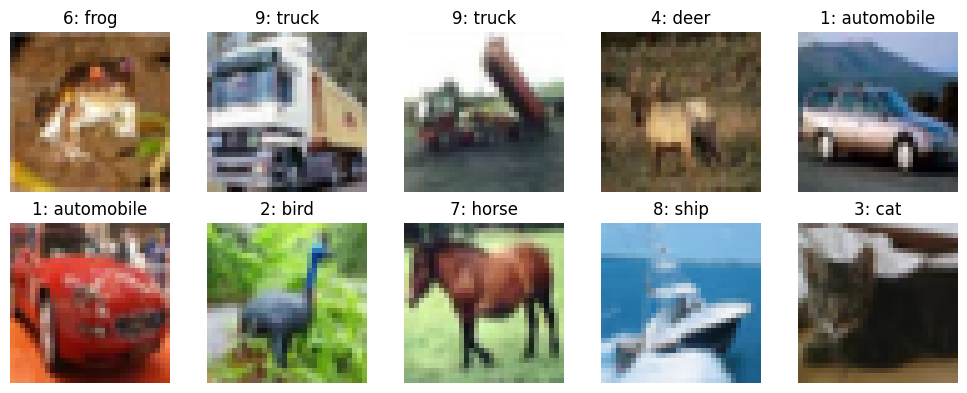

In [26]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")

fig.tight_layout()

In [27]:
x_train[1].shape

(32, 32, 3)

In [28]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [29]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()


(0.0, 1.0)

## CNN model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):
    # optimizer which is used for learning
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, # number of kernels in each layer
            kernel_size=(3, 3), # also (5,5), (7,7) available
            activation="relu",# good starting point
            kernel_initializer="he_normal", # initializing weights, good to use with relu
            input_shape=x_train.shape[1:] # 32x32x3
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        ) # note these can also be tuned


    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(10, activation="softmax")
    ) # softmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model
    
model = cnn_model(kernels=[32,64,32])
model.summary()

c:\Users\Carlos\Documents\github\AI-Carlos-hillgren-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 /5,
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - acc: 0.2468 - loss: 1.9928 - val_acc: 0.4631 - val_loss: 1.4580
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - acc: 0.4406 - loss: 1.5232 - val_acc: 0.5274 - val_loss: 1.3148
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.5010 - loss: 1.3798 - val_acc: 0.5669 - val_loss: 1.2188
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - acc: 0.5424 - loss: 1.2712 - val_acc: 0.5943 - val_loss: 1.1536
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - acc: 0.5540 - loss: 1.2330 - val_acc: 0.6022 - val_loss: 1.1390
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.5779 - loss: 1.1768 - val_acc: 0.6122 - val_loss: 1.0910
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.5943 - loss: 1.1371 - val_acc: 0.6394 - val_loss: 1.0438
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.6055 - loss: 1.1021 - val_acc: 0.6549 - val_loss: 1.0002
Epoch 9/100
1250

In [42]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.323175,1.803672,0.4631,1.458021
1,0.454525,1.490270,0.5274,1.314812
2,0.505600,1.366270,0.5669,1.218767
3,0.540525,1.272664,0.5943,1.153632
4,0.557175,1.228586,0.6022,1.139001


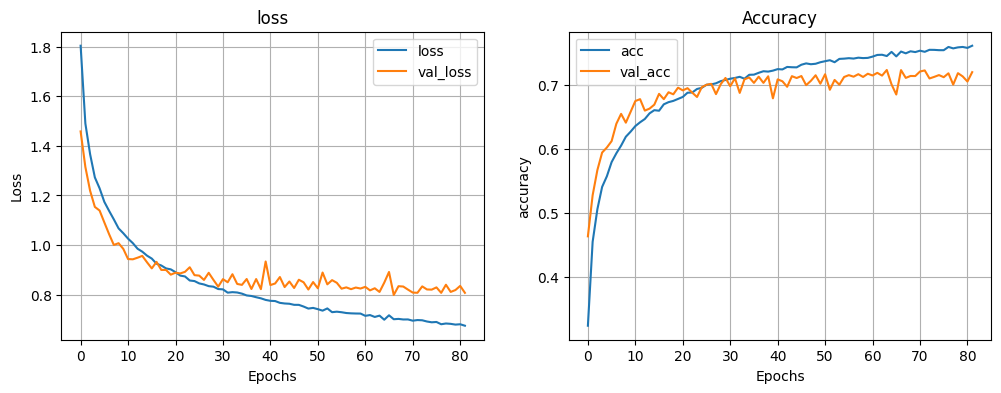

In [43]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[["loss", "val_loss"]].plot(
        ax=ax[0], title="Loss", grid=True, xlabel="Epochs", ylabel="Loss"
    )
    metrics[["acc", "val_acc"]].plot(
        ax=ax[1],title="Accuracy", grid=True, xlabel="Epochs", ylabel="accuracy"
    )

plot_metrics(metrics)

### Hyperparameter tuning
- dropout rate
- learing rate
- different network configaúrations
- which type of pooling layer
- different optimizers
- ....

we pick dropout to tune

In [44]:
# short patience for demo
early_stopper = EarlyStopping(
    monitor = "val_loss",mode="min", patience=3, restore_best_weights=True
)

def evaluate_model(**kwargs):
    model = cnn_model(**kwargs)
    # few epochs for demo
    model.fit(
        scaled_X_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_split=1/5,
    )

    metrics = pd.DataFrame(model.history.history)
    # gets last epochs validation accuracy
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [45]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1, .6, .1):
    dropout_rate = np.round(dropout_rate, 1)
    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

c:\Users\Carlos\Documents\github\AI-Carlos-hillgren-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - acc: 0.3888 - loss: 1.7141 - val_acc: 0.5782 - val_loss: 1.1910
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - acc: 0.6045 - loss: 1.1122 - val_acc: 0.6220 - val_loss: 1.0741
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.6748 - loss: 0.9192 - val_acc: 0.6722 - val_loss: 0.9316
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - acc: 0.7192 - loss: 0.7893 - val_acc: 0.6953 - val_loss: 0.8993
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - acc: 0.7665 - loss: 0.6697 - val_acc: 0.6921 - val_loss: 0.9080
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.8064 - loss: 0.5669 - val_acc: 0.6986 - val_loss: 0.9281
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - acc: 0.8345 - loss: 0.4721 - val_acc: 0.6989 - val_loss: 0.9416
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - acc: 0.4174 - loss: 1.6244 - val_acc: 0.6066 - val_loss: 1.1309
Epoch 2/10
1250/1250 ━━━

In [46]:
scaled_X_test[2:3].shape

(1, 32, 32, 3)

In [47]:
model.predict(scaled_X_test[2:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.08289045, 0.01771341, 0.00780379, 0.0315451 , 0.00122219,
        0.00603982, 0.00286769, 0.00993469, 0.8125546 , 0.02742824]],
      dtype=float32)

In [48]:
y_test[2]

8